# CMEMS Sea Temperature Products


From the [Copernicus Marine Service](https://marine.copernicus.eu/) 2 dataset are download to work with the sea temperature (thetao and analyzed_sst) variable.

- a model temperature dataset from [**Global Ocean 1/12° Physics Analysis and Forecast updated Daily**](https://resources.marine.copernicus.eu/product-detail/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/INFORMATION). 

- a satellite observation dataset from [**ESA SST CCI and C3S reprocessed sea surface temperature analyses**](https://resources.marine.copernicus.eu/product-detail/SST_GLO_SST_L4_REP_OBSERVATIONS_010_024/INFORMATION) 
 

In [1]:
# # Dependencies
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Paths to load the files

# Model temperature dataset
path_mod = 'data/global-analysis-forecast-phy-001-024-monthly_1660839616632.nc'

# satellite observation dataset
path_sat = 'data/C3S-GLO-SST-L4-REP-OBS-SST_1660837959244.nc'

# # Products variables
mod = xr.open_dataset(path_mod)
sat = xr.open_dataset(path_sat)

In [3]:
# Display the content of the model file
mod

<xarray.Dataset>
Dimensions:    (depth: 24, time: 7, latitude: 121, longitude: 181)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 2020-08-16T12:00:00 ... 2021-02-15
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Data variables:
    siconc     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [4]:
# Target Variable. Thetao or sea water potential temperature
temp_mod = mod['thetao']

temp_mod

<xarray.DataArray 'thetao' (time: 7, depth: 24, latitude: 121, longitude: 181)>
[3679368 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 2020-08-16T12:00:00 ... 2021-02-15
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    cell_methods:   area: mean

In [5]:
# Check other varibles in the model dataset. date times for example
mod['time']

<xarray.DataArray 'time' (time: 7)>
array(['2020-08-16T12:00:00.000000000', '2020-09-16T00:00:00.000000000',
       '2020-10-16T12:00:00.000000000', '2020-11-16T00:00:00.000000000',
       '2020-12-16T12:00:00.000000000', '2021-01-16T12:00:00.000000000',
       '2021-02-15T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-08-16T12:00:00 2020-09-16 ... 2021-02-15
Attributes:
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    axis:                 T
    _CoordinateAxisType:  Time
    valid_min:            619092.0
    valid_max:            623472.0

In [6]:
# Exact date
mod.sel(time='2020-11-16')

<xarray.Dataset>
Dimensions:    (depth: 24, time: 1, latitude: 121, longitude: 181)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 2020-11-16
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Data variables:
    siconc     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [7]:
# the nearest date of a random 
mod.sel(time='2020-11-05T00', method='nearest')

<xarray.Dataset>
Dimensions:    (depth: 24, latitude: 121, longitude: 181)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
    time       datetime64[ns] 2020-11-16
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Data variables:
    siconc     (latitude, longitude) float32 ...
    thetao     (depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [8]:
# Date from its index
mod.isel(time=[3])

<xarray.Dataset>
Dimensions:    (depth: 24, time: 1, latitude: 121, longitude: 181)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 2020-11-16
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Data variables:
    siconc     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [9]:
# Range of dates
mod.sel(time=slice('2020-08-01','2020-12-31'))

<xarray.Dataset>
Dimensions:    (depth: 24, time: 5, latitude: 121, longitude: 181)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 92.33 109.7 130.7
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 2020-08-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Data variables:
    siconc     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

# SST plot

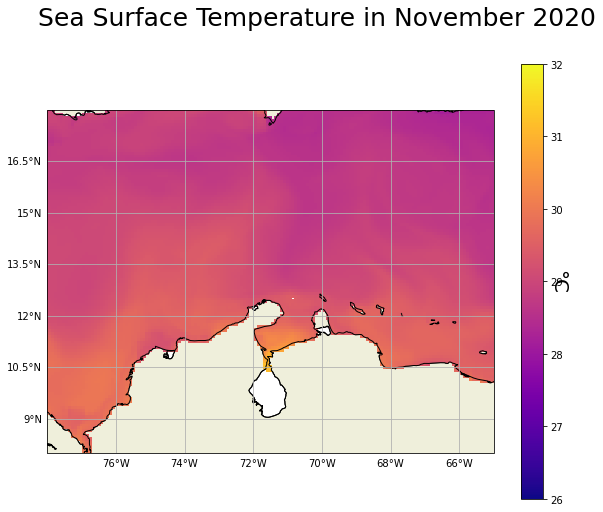

In [10]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
temp_mod = mod['thetao'].sel(depth=0,method='nearest').sel(time='2020-11-16').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(10, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-78, -65, 8, 18],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_mod['longitude'].data, temp_mod['latitude'].data,temp_mod,vmin=26,vmax=32,cmap='plasma')
    

# Add the titles and legend
f.suptitle('Sea Surface Temperature in November 2020',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax)                                                        # add the colorbar
cbar.set_label('°C', rotation=270,fontsize=20)                                     # add the title of the colorbar

# Save figure
plt.savefig('images/sst_map_caribe_col.png')

# Kelvin transformation into Celcius temperatures

In [11]:
# Check the initial values of the temperatures in sat dataset
sat['analysed_sst']

<xarray.DataArray 'analysed_sst' (time: 93, lat: 201, lon: 300)>
[5607900 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-10-01T12:00:00 ... 2021-01-01T12:00:00
  * lat      (lat) float32 8.025 8.075 8.125 8.175 ... 17.88 17.92 17.98 18.02
  * lon      (lon) float32 -79.97 -79.93 -79.88 -79.82 ... -65.12 -65.07 -65.03
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_water_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         AVHRR19_G-C3S-L3U-ICDR-v2.0 AVHRRMTA_G-C3S-L3U-ICDR-v2.0 ...
    _ChunkSizes:    [   1 1200 2400]

In [12]:
# Converting into Celcius degrees 
sat['analysed_sst']-273.16

<xarray.DataArray 'analysed_sst' (time: 93, lat: 201, lon: 300)>
array([[[29.059998, 29.029999, 29.      , ...,       nan,       nan,
               nan],
        [29.079987, 29.049988, 29.029999, ...,       nan,       nan,
               nan],
        [29.099976, 29.079987, 29.059998, ...,       nan,       nan,
               nan],
        ...,
        [30.109985, 30.179993, 30.23999 , ..., 29.73999 , 29.709991,
         29.690002],
        [30.129974, 30.199982, 30.23999 , ..., 29.699982, 29.679993,
         29.660004],
        [30.169983, 30.220001, 30.23999 , ..., 29.669983, 29.649994,
         29.629974]],

       [[29.129974, 29.099976, 29.059998, ...,       nan,       nan,
               nan],
        [29.149994, 29.119995, 29.089996, ...,       nan,       nan,
               nan],
        [29.169983, 29.149994, 29.119995, ...,       nan,       nan,
               nan],
...
        [27.629974, 27.619995, 27.619995, ..., 27.220001, 27.209991,
         27.22998 ],
        [27.589996, 27.579987, 27.569977, ..., 27.22998 , 27.220001,
         27.22998 ],
        [27.549988, 27.539978, 27.529999, ..., 27.22998 , 27.22998 ,
         27.22998 ]],

       [[28.119995, 28.169983, 28.129974, ...,       nan,       nan,
               nan],
        [28.119995, 28.169983, 28.139984, ...,       nan,       nan,
               nan],
        [28.109985, 28.139984, 28.119995, ...,       nan,       nan,
               nan],
        ...,
        [27.589996, 27.559998, 27.539978, ..., 27.099976, 27.099976,
         27.109985],
        [27.539978, 27.50998 , 27.5     , ..., 27.109985, 27.099976,
         27.109985],
        [27.48999 , 27.459991, 27.449982, ..., 27.109985, 27.109985,
         27.109985]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-10-01T12:00:00 ... 2021-01-01T12:00:00
  * lat      (lat) float32 8.025 8.075 8.125 8.175 ... 17.88 17.92 17.98 18.02
  * lon      (lon) float32 -79.97 -79.93 -79.88 -79.82 ... -65.12 -65.07 -65.03

# Time series plot

In [14]:
# Define the coordinates of the point on which to plot the time series
lon, lat = -62, 12
date_min, date_max = '2020-11-01', '2020-11-30'

# Select the temperature variable from the product, at this point and these dates
temp_sat = sat['analysed_sst'].sel(lon=lon,lat=lat,method='nearest').sel(time=slice(date_min,date_max))

# Convert Kelvin into Celsius
temp_sat = temp_sat - 273.15

# Display the content of the new variable
temp_sat

<xarray.DataArray 'analysed_sst' (time: 30)>
array([28.600006, 28.440002, 28.320007, 28.25    , 28.470001, 28.549988,
       28.579987, 28.700012, 28.910004, 28.899994, 29.049988, 28.829987,
       28.779999, 28.829987, 28.829987, 29.040009, 28.859985, 28.839996,
       28.869995, 28.940002, 28.899994, 28.48999 , 27.850006, 27.76001 ,
       28.329987, 28.609985, 28.609985, 28.320007, 28.350006, 28.309998],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-01T12:00:00 ... 2020-11-30T12:00:00
    lat      float32 12.02
    lon      float32 -65.03

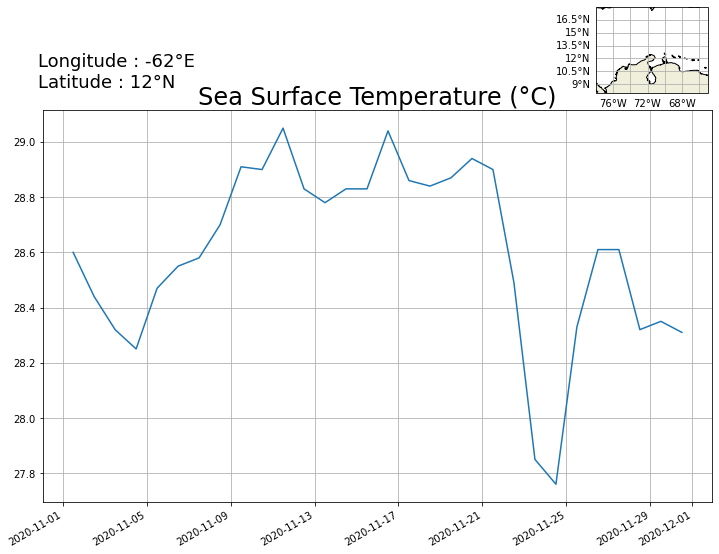

In [15]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(12,8))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Sea Surface Temperature (°C)",fontsize=24)             # add the figure title
f.suptitle('Longitude : ' +str(lon) +'°E\nLatitude : ' + str(lat)+'°N',
           fontsize=18,horizontalalignment='left',x=0.12)            # Display the coordinates on the plot
f.autofmt_xdate()                                                    # format the dates in the x axis 
im = ax.plot(temp_sat['time'],temp_sat)                              # plot the time serie

# Display the location of the point on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree())  # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                      # add the coastlines
gl.right_labels = False                                                           # remove latitude labels on the right
gl.top_labels = False                                                             # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                   # add land mask 
ax_mini_map.set_extent([-78, -65, 8, 18],crs=ccrs.PlateCarree())                  # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon, lat, 30,transform=ccrs.PlateCarree())                    # plot the location of the point

# Save figure
plt.savefig('images/time_series_sst_caribbean.png')

# Vertical slice plot

In [16]:
# Check the depths included in the model file
mod['depth']

<xarray.DataArray 'depth' (depth: 24)>
array([  0.494025,   1.541375,   2.645669,   3.819495,   5.078224,   6.440614,
         7.92956 ,   9.572997,  11.405   ,  13.46714 ,  15.81007 ,  18.49556 ,
        21.59882 ,  25.21141 ,  29.44473 ,  34.43415 ,  40.34405 ,  47.37369 ,
        55.76429 ,  65.80727 ,  77.85385 ,  92.32607 , 109.7293  , 130.666   ],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 3.819 ... 77.85 92.33 109.7 130.7
Attributes:
    valid_min:               0.494025
    valid_max:               130.666
    units:                   m
    positive:                down
    unit_long:               Meters
    long_name:               Depth
    standard_name:           depth
    axis:                    Z
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

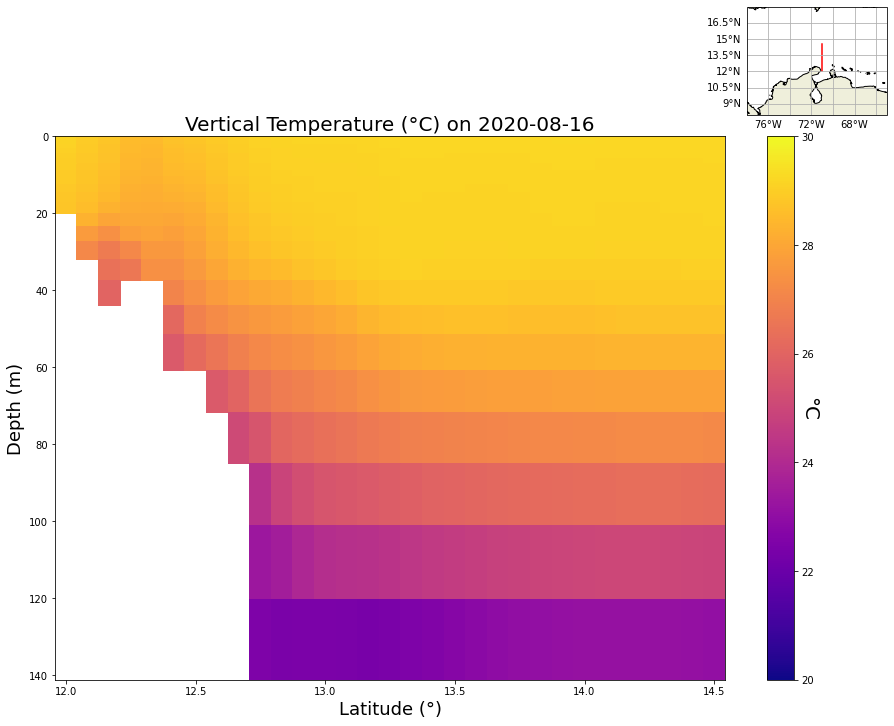

In [17]:
# Set the coordinates of the line
longitude = -71
latitude_min, latitude_max = 12, 14.5

# Get the temperature values along this line for a defined date
temp_mod = mod.sel(longitude=longitude,method='nearest').sel(latitude=slice(latitude_min,latitude_max)).isel(time=[0]).squeeze()

# Get the datetime 
date = np.datetime_as_string(temp_mod['time'].data,unit='D')

# Define the caracteristics of the plot
f = plt.figure(figsize=(15,10))                                      # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.set_title("Vertical Temperature (°C) on "+ date,fontsize=20)      # set the title of the figure
ax.set_ylabel("Depth (m)",fontsize=18)                               # set the  y axis label
ax.set_xlabel("Latitude (°)",fontsize=18)                            # set the  y axis label
ax.invert_yaxis()                                                    # reverse the y axis 

im = ax.pcolor(temp_mod['latitude'],temp_mod['depth'],temp_mod['thetao'],vmin=20,vmax=30,cmap='plasma')  # display the temperature
cbar = f.colorbar(im,ax=ax)                                                                              # add the colorbar
cbar.set_label('°C', rotation=270,fontsize=20)                                                           # add the title of the colorbar

# Display the locations of the line on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-78, -65, 8, 18],crs=ccrs.PlateCarree())                 # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.plot([longitude,longitude],[latitude_min,latitude_max],'r')          # add the location of the line on the mini map

# Save figure
plt.savefig('images/vertical_temp_line_caribbean.png')